# KNN-Classifier

In [16]:
import numpy as np

def train(X_train, y_train):
    '''trains the K-NN classifier; i.e. storage of training data'''
    return

In [17]:
# Takes two samples x and y and computes the euclidean distance
euclidean = lambda x,y : np.sqrt(np.sum((x-y)**2))

def calculate_distance(X_new, X_train):
  ''' Calculates distance between new sample and stored training samples'''

  distances = []

  for i in range(len(X_train)):
      distances.append(euclidean(X_new,X_train[i,:]))
  return distances

In [18]:
def predict_labels(y_train, distances, k):
  near_neigh_index = np.argsort(distances)[:k] # Find indices of k nearest neighbors
  neigh_labels = y_train[near_neigh_index]  # labels of k nearest neighbors

  return neigh_labels

In [19]:
def knn_classifier(X_train, y_train, X_test, k):
  '''K-NN classifier : Trains and then predicts label of test set

  Parameters
  ----------
  X_train: Numpy.array, shape(n,m)
      training feature vector
  y_train: Numpy.array, shape(n,)
      training target vector
  X_test: Numpy.array, shape(z,m)
      Data to be classified
  k: int
      Number of neighbors to take into account

  Returns
  -------
  predictions: Numpy.array, shape(z,)
      predicted labels of X_test
  '''

  train(X_train, y_train) # Training phase

  predictions = []

  for i in range(len(X_test)): # Prediction phase
    neigh_dist = calculate_distance(X_test[i,:], X_train)
    k_labels = predict_labels(y_train, neigh_dist, k)
    predictions.append(np.argmax(np.bincount(k_labels)))

  return np.array(predictions)

## Performing knn classifier with iris dataset

In [20]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X_iris, y_iris = load_iris(return_X_y = True) # Loading the iris dataset

X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.3)

In [21]:
# Predictions of training set
y_train_pred = knn_classifier(X_train, y_train, X_train, 3)

# Predictions of test set
y_test_pred = knn_classifier(X_train, y_train, X_test, 3)

In [22]:
from sklearn.metrics import classification_report

# Performance evaluation
print('\t------------------training set------------------')
print(classification_report(y_train, y_train_pred))
print('\t--------------------test set--------------------')
print(classification_report(y_test, y_test_pred))

	------------------training set------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.97      0.95      0.96        38
           2       0.94      0.97      0.95        31

    accuracy                           0.97       105
   macro avg       0.97      0.97      0.97       105
weighted avg       0.97      0.97      0.97       105

	--------------------test set--------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.92      0.92      0.92        12
           2       0.95      0.95      0.95        19

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



- performs exceptionally with accuracy of 97% on training set, and 96% on test set.

## KNN Regression

In [23]:
import numpy as np

class Knnregression():

  def __init__(self, k):

    self.k = k

  def fit(self, X_train, y_train):

    self.X_train = X_train
    self.y_train = y_train

  def _calculate_euc_dist_mat(self, X_test):

    a = np.sum(self.X_train**2, axis=1).reshape(-1,1) # Reshaping for proper euclidean matrix.
    b_T = np.sum(X_test**2, axis=1)
    W = -2 * np.dot(self.X_train,X_test.T)
    euc_mat = np.sqrt(a + b_T + W + 1e-10) # Adding small value to avoid warning.

    return euc_mat

  def predict(self, X_test):

    self.predictions = []

    dist_mat = self._calculate_euc_dist_mat(X_test)

    for i in range(X_test.shape[0]):
      distance = dist_mat[:,i] # Taking ith column of distance matrix
      near_neigh_index = np.argsort(distance)[:self.k]
      near_neigh_labels = self.y_train[near_neigh_index]

      self.predictions.append(np.mean(near_neigh_labels)) # Aggregation

    return np.array(self.predictions)

### Performing KNN on California housing

In [24]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X, y = fetch_california_housing(return_X_y=True)

X_scaled = MinMaxScaler().fit_transform(X)    # KNN needs to feature scaled before modelling for regression because of dependency on distance fxn

print(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

[[0.53966842 0.78431373 0.0435123  ... 0.00149943 0.5674814  0.21115538]
 [0.53802706 0.39215686 0.03822395 ... 0.00114074 0.565356   0.21215139]
 [0.46602805 1.         0.05275646 ... 0.00169796 0.5642933  0.21015936]
 ...
 [0.08276438 0.31372549 0.03090386 ... 0.0013144  0.73219979 0.31175299]
 [0.09429525 0.33333333 0.03178269 ... 0.0011515  0.73219979 0.30179283]
 [0.13025338 0.29411765 0.03125246 ... 0.00154886 0.72582359 0.30976096]]


In [25]:
knn_reg = Knnregression(k=4)
knn_reg.fit(X_train, y_train)

knn_y_train_pred = knn_reg.predict(X_train)
knn_y_test_pred = knn_reg.predict(X_test)

### Comparing knn regression with classic linear regression model

In [26]:
from sklearn.metrics import mean_squared_error

knn_train_error = mean_squared_error(y_train, knn_y_train_pred)
knn_test_error = mean_squared_error(y_test, knn_y_test_pred)

print(f'KNN, Training MSE: {knn_train_error:.2f}')
print(f'KNN, Test MSE: {knn_test_error:.2f}')

KNN, Training MSE: 0.24
KNN, Test MSE: 0.42


In [27]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

lin_y_train_pred = lin_reg.predict(X_train)
lin_y_test_pred = lin_reg.predict(X_test)

lin_train_error = mean_squared_error(y_train, lin_y_train_pred)
lin_test_error = mean_squared_error(y_test, lin_y_test_pred)

print(f'Linear Regression, Training MSE: {lin_train_error:.2f}')
print(f'Linear Regression, Test MSE: {lin_test_error:.2f}')

Linear Regression, Training MSE: 0.52
Linear Regression, Test MSE: 0.56


- The MSE errors for K-NN regression and linear regression model are around the same range, with slightly better performance of K-NN.

## Searching nearest neighbors

### Brute force method using manhattan distance metric

In [28]:
post_offices_loc = [(6,12), (3,7), (10,10), (8,4), (15,2), (12,11), (14,10)]
your_loc = (12,9)

# Find distance between points
distances=[]
for i in range(len(post_offices_loc)):
    distances.append(abs((your_loc[0] - post_offices_loc[i][0])) + abs(your_loc[1] - post_offices_loc[i][1]))
    
distances

[9, 11, 3, 9, 10, 2, 3]

In [29]:
def get_indexes_min_value(l):
    min_value = min(l)
    if l.count(min_value) > 1:
        return [i for i, x in enumerate(l) if x == min(l)]
    else:
        return l.index(min(l))
    
location = get_indexes_min_value(distances)
post_offices_loc[location]

(12, 11)

### KD tree for nearest neighbor search

In [30]:
import numpy as np
from sklearn.neighbors import KDTree

rng = np.random.RandomState(0)
X = rng.random_sample((10, 2))  # 10 points in 3 dimensions
print(X)
print("\n")
tree = KDTree(X, leaf_size=2)

dist, ind = tree.query(X[:1], k=3)                
print(ind)  # indices of 3 closest neighbors
print(dist)  # distances to 3 closest neighbors

[[0.5488135  0.71518937]
 [0.60276338 0.54488318]
 [0.4236548  0.64589411]
 [0.43758721 0.891773  ]
 [0.96366276 0.38344152]
 [0.79172504 0.52889492]
 [0.56804456 0.92559664]
 [0.07103606 0.0871293 ]
 [0.0202184  0.83261985]
 [0.77815675 0.87001215]]


[[0 2 1]]
[[0.         0.14306129 0.1786471 ]]


## Brute force method in detail

In [31]:
import numpy as np
import random
import operator

In [38]:
from sklearn.datasets import make_blobs
import numpy as np

#set seed for reproducibility
np.random.seed(1)

X1, Y1 = make_blobs(n_features=2, centers=3, random_state=1, n_samples=200, cluster_std=2)

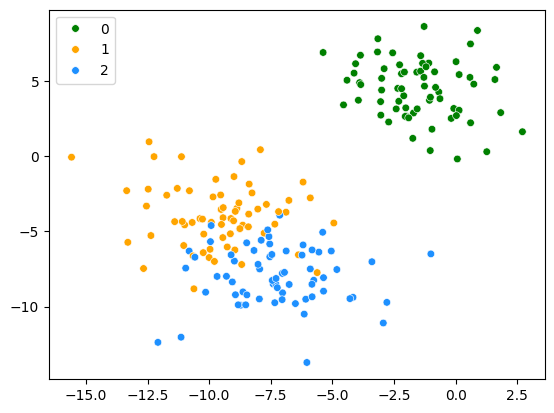

In [36]:
import seaborn as sns
ax = sns.scatterplot(x=X1[:,0], y= X1[:,1], hue=Y1 , s=30, palette=['green','orange','dodgerblue'], legend='full')

- I can use skleran train_test_split and find 1-NN of multiple values. In this case it will be complex. For simplicity I will consider one point.

In [39]:
q = np.array([-0.77, 5.5])  #query point

In [41]:
# function to find euclidean distance
def find_distance(query, data):
  dist=list()
  for index in range(len(data)):
      dist.append(np.sqrt(np.sum((query - data[index])**2)) )
  return dist

In [42]:
dist = find_distance(q,X1)
dist[:5]

[np.float64(17.346147496036416),
 np.float64(15.83337307077492),
 np.float64(13.9123774588038),
 np.float64(11.924975479004527),
 np.float64(12.796684329689311)]

In [43]:
dist = enumerate(dist)   # index, value pair

In [44]:
sorted_data = sorted(dist, key=lambda x:x[1])
sorted_data[:5]

[(128, np.float64(0.12485448854556064)),
 (158, np.float64(0.5843445913095896)),
 (153, np.float64(0.6080293992576578)),
 (101, np.float64(0.6643544863472753)),
 (6, np.float64(0.7479236445215508))]

In [45]:
k = 1  # nearest neighbor value

In [46]:
data_index = list(next(zip(*sorted_data)))[:k]   #zip creates tuple of indices and values, 
                                                 #next takes the first tuple, list converts tuple to list
data_index

[128]

### Find Candidate Output Class

In [47]:
output_class_candidate = np.take(Y1, data_index)
output_class_candidate

array([0])

- The output is zero; therefore the query point belongs to class zero.

### Vote Candidates Output Class and Choose Maximum Voted Class

In [48]:
# if k>1
output_after_voting = np.bincount(output_class_candidate).argmax()
output_after_voting

np.int64(0)

In [54]:
X1[data_index][0][1]   # X1[data_index] -> calculates the value of X1 of the index, X1[data_index][0] -> first row of X1[data_index], X1[data_index][0][1] -> second feature of X1[data_index][0]

np.float64(5.593646915317295)

<Axes: >

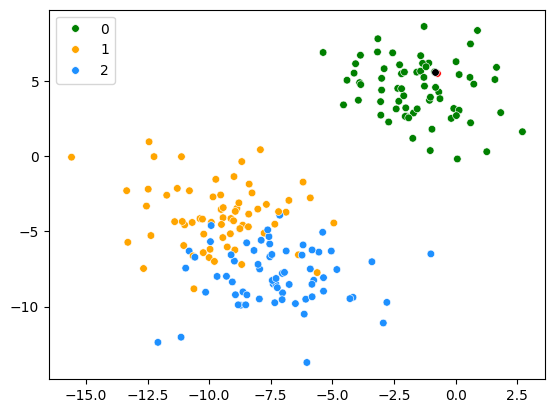

In [50]:
sns.scatterplot(x= X1[:,0], y= X1[:,1], hue=Y1 , s=30, palette=['green','orange','dodgerblue'], legend='full')
sns.scatterplot(x = [q[0]], y = [q[1]], color='red', marker='o',s=30,legend='full')
sns.scatterplot(x = [X1[data_index][0][0]], y = [X1[data_index][0][1]], color='black', marker='o',s=30,legend='full')

- The red dot represents the query point. It lies in the crowd of green color dots. Therefore output class must be zero. My prediction is correct.